# This Utility code:
## This code helps in analysing the scenarios record and display the required results.

## 1. Configuration
### CARLA Location and Connection information

In [ ]:
# Specify the carla location and IP to connect with.

CARLA_PATH = '/home/hilalss/work/CARLA_0.9.10.1/PythonAPI'
HOST = '127.0.0.1'
PORT = 2000

### Record file path to analyse

In [ ]:
recorder_filename = '/home/hilalss/work/LAV/data/rec/RouteScenario_33_rep0.log'

TIME = 30
DISTANCE = 100

## 2. Import the required libraries

In [1]:
# run this code and make sure CARLA simulator is running

import glob
import os
import sys
import pandas as pd
import json
carla-0.9.10-py3.7-linux-x86_64.egg
# try:
    sys.path.append(glob.glob(CARLA_PATH+'/carla/dist/carla-0.9.10-py3.7-linux-x86_64.egg'))
# except IndexError:
#     pass

# import carla


## 3. Utilizing the Record logs

### - List of the blocked agents cases in this scenario:

In [ ]:
try:

    client = carla.Client(HOST, PORT)
    client.set_timeout(60.0)

    print(client.show_recorder_actors_blocked(recorder_filename, TIME, DISTANCE))

finally:
    pass

### - List of all collission cases in this scenario

In [ ]:
try:

    client = carla.Client(HOST, PORT)
    client.set_timeout(60.0)

    print(client.show_recorder_collisions(recorder_filename, "v", "a"))

finally:
    pass

## 4. Run the scenario in the specific period
### - Baseed on the above code information specify the following:
in the replay_file method replay_file(record_filename, start_sec, end_sec, camera_actor_id):
- start_sec: From which second you want to start the scenario (eg. you want to start 3 sec before the collision happen based on the previous code information)
- end_sec: Which second you want the scenario to stop.
- camera_actor_id: based on the previous code information, you can get the id of the vehicle you want to follow, and specify it in this argument. however, if the id is invalud, the camera will be always shows from top.

In [ ]:
try:

    client = carla.Client(HOST, PORT)
    client.set_timeout(60.0)

    
            #replay_file(record_filename, start_sec, end_sec, camera_actor_id)
    client.replay_file(recorder_filename,100,177,6034)

finally:
    pass

# Results Statistics

## 1. configuration
### configure the location of the results files locations

In [20]:
mlmas_leaderboard_results_file = os.getcwd().replace('/MLMAS_Framework/tools','/results/MLMAS_LAV_results.json')
mlmas_additional_metrics_file = os.getcwd().replace('/MLMAS_Framework/tools','/results/MLMAS_LAV_results_jason_metrics.csv')
lav_leaderboard_results = os.getcwd().replace('/MLMAS_Framework/tools','/results/LAV_result_longest6.json')


### Load the files

In [24]:
def loadLeaderboardJson(filepath):
    f = open(os.path.realpath(filepath))
    return json.load(f)
    

def geLeaderboardMetrics(jsn):
    leaderboard_metrics = jsn['values']
    leaderboard_df = pd.DataFrame([jsn['values']],
                                  columns=jsn['labels'])
    leaderboard_df = leaderboard_df.astype(float)
    
    return leaderboard_df



mlmas_leaderboard_jsn = loadLeaderboardJson(mlmas_leaderboard_results_file)
lav_leaderboard_jsn = loadLeaderboardJson(lav_leaderboard_results)


### Display the leaderboard results

In [173]:
mlmas_leaderboard_df = geLeaderboardMetrics(mlmas_leaderboard_jsn).drop(columns="Route deviations")
lav_leaderboard_df = geLeaderboardMetrics(lav_leaderboard_jsn).drop(columns="Route deviations")
display(mlmas_leaderboard_df)
print("== MLMAS Framework with LAV Model Leaderboard Metrics results ==")
print("== ========================================================== ==")
display(lav_leaderboard_df)
print("== LAV Model Only Leaderboard Metrics results ==")

,Avg. driving score,Avg. route completion,Avg. infraction penalty,Collisions with pedestrians,Collisions with vehicles,Collisions with layout,Red lights infractions,Stop sign infractions,Off-road infractions,Route timeouts,Agent blocked
0,52.472,96.379,0.556,0.034,0.044,0.042,0.212,0.201,0.141,0.0,0.0


== MLMAS Framework with LAV Model Leaderboard Metrics results ==
== ========================================================== ==


,Avg. driving score,Avg. route completion,Avg. infraction penalty,Collisions with pedestrians,Collisions with vehicles,Collisions with layout,Red lights infractions,Stop sign infractions,Off-road infractions,Route timeouts,Agent blocked
0,34.435,77.716,0.474,0.056,0.247,0.091,0.234,0.211,0.131,0.012,0.279


== LAV Model Only Leaderboard Metrics results ==


In [319]:
def mergeTwoLeaderbordMetricsResults(title1, title2, df1, df2):
    score_columns = df1.columns.values[0:2]
    collisions_columns = df1.columns.values[3:6]
    other_columns = df1.columns.values[6:]
    final_df_s = pd.DataFrame({title1: df1[score_columns].values[0]
                  , title2: df2[score_columns].values[0]
                  , 'Results_Higher_is_Better': score_columns}) 
    
    final_df_c = pd.DataFrame({title1: df1[collisions_columns].values[0]
              , title2: df2[collisions_columns].values[0]
              , 'Results_Lower_is_Better': collisions_columns}) 
    
    final_df_o = pd.DataFrame({title1: df1[other_columns].values[0]
          , title2: df2[other_columns].values[0]
          , 'Results_Lower_is_Better': other_columns}) 
        
        
    final_df_s.index = final_df_s.Results_Higher_is_Better
    final_df_c.index = final_df_c.Results_Lower_is_Better
    final_df_o.index = final_df_o.Results_Lower_is_Better
    return final_df_s, final_df_c, final_df_o

def show_values(g, pr="%", is_vertical = True):
    for p in g.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        if is_vertical:
            g.annotate(f'{height}{pr}', (x + width/2, y + height*1.02), ha='center')
        else:
            g.annotate(f'{width}{pr}', (x + width + 0.07, y + height/2), ha='center')



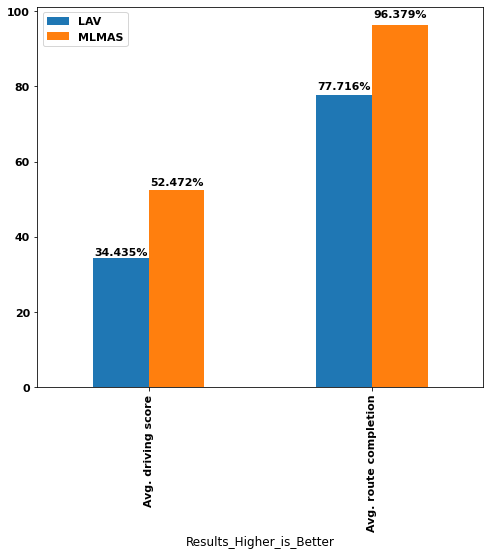

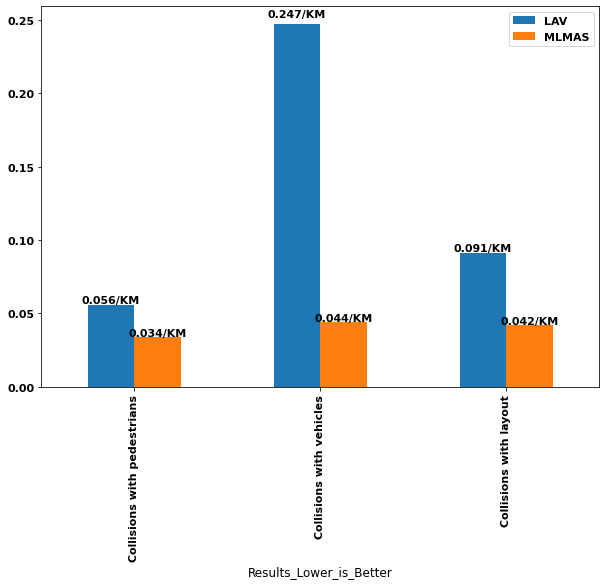

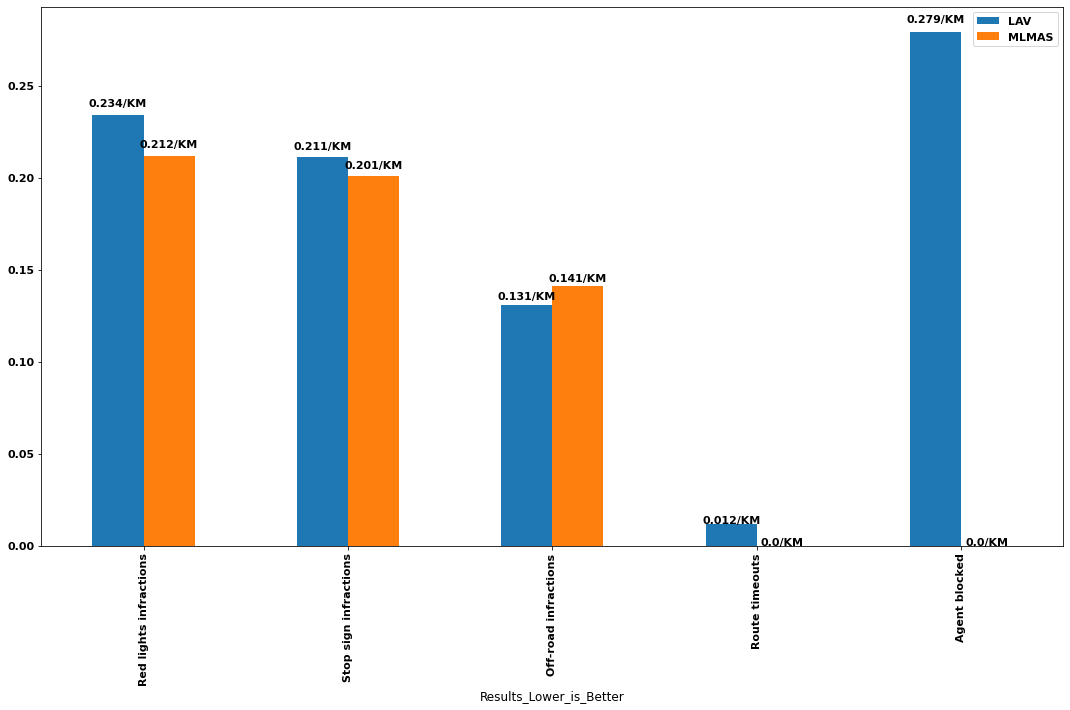

In [334]:
import matplotlib.pyplot as plt
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 11}

plt.rc('font', **font)


final_df_s, final_df_c, final_df_o = mergeTwoLeaderbordMetricsResults('LAV','MLMAS', lav_leaderboard_df ,mlmas_leaderboard_df)
graph = final_df_s.plot.bar(figsize=(8,7))

graph2 = final_df_c.plot.bar(figsize=(10,7))
graph3 = final_df_o.plot.bar(figsize=(15,10))

plt.tight_layout()
show_values(graph)
show_values(graph2, pr="/KM")
show_values(graph3, pr="/KM")

## Jason Agent Additional Metrics

In [201]:
jason_metrics_csv = pd.read_csv(mlmas_additional_metrics_file, delimiter=';')

final_columns = jason_metrics_csv.columns.values
final_columns[6], final_columns[7] = final_columns[7], final_columns[6]

jason_metrics_csv = jason_metrics_csv[final_columns]
additional_metrics_columns = ["Total Frames", 
                              "Front Collision Avoidance",
                             "Far Crossing Collision Avoidance",
                             "Close Crossing Collision Avoidance",
                             "Back Collision Avoidance",
                             "Traffic Light Green [Go]",
                             "Traffic Light Slowdown",
                             "blockage interference"]
jason_metrics_csv.columns = additional_metrics_columns

print("== The additional Jason Agent metrics in each scenario")
jason_metrics_csv

== The additional Jason Agent metrics in each scenario


,Total Frames,Front Collision Avoidance,Far Crossing Collision Avoidance,Close Crossing Collision Avoidance,Back Collision Avoidance,Traffic Light Green [Go],Traffic Light Slowdown,blockage interference
0,8316,0.008,0.011,0.055,0.026,0.004,0.000,0.003
1,10494,0.017,0.007,0.040,0.036,0.005,0.000,0.003
2,6346,0.003,0.005,0.022,0.006,0.005,0.000,0.004
3,7014,0.004,0.004,0.031,0.016,0.003,0.000,0.002
4,4351,0.000,0.025,0.046,0.023,0.003,0.000,0.002
5,4829,0.001,0.011,0.033,0.000,0.020,0.000,0.002
6,13632,0.009,0.004,0.031,0.022,0.002,0.000,0.003
7,12284,0.013,0.006,0.024,0.029,0.006,0.000,0.002
8,7614,0.006,0.008,0.028,0.019,0.007,0.000,0.005
9,10626,0.008,0.006,0.041,0.061,0.007,0.000,0.004


## Summary of the additional metrics

In [204]:
jason_metrics_csv.describe()

,Total Frames,Front Collision Avoidance,Far Crossing Collision Avoidance,Close Crossing Collision Avoidance,Back Collision Avoidance,Traffic Light Green [Go],Traffic Light Slowdown,blockage interference
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.00000,36.000000
mean,11361.916667,0.006944,0.006861,0.023500,0.016306,0.006694,0.01725,0.002500
std,4645.471013,0.006042,0.004987,0.016782,0.019117,0.004458,0.02695,0.001082
min,2612.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001000
25%,7794.750000,0.003750,0.004000,0.009000,0.003000,0.004750,0.00000,0.002000
50%,11031.500000,0.006000,0.006000,0.022000,0.011500,0.006000,0.00000,0.002000
75%,13764.750000,0.008000,0.009250,0.033250,0.021250,0.007250,0.02850,0.003000
max,20181.000000,0.030000,0.025000,0.071000,0.087000,0.020000,0.10400,0.005000


Total Average Agent Interferance Percentage: (8.1%)


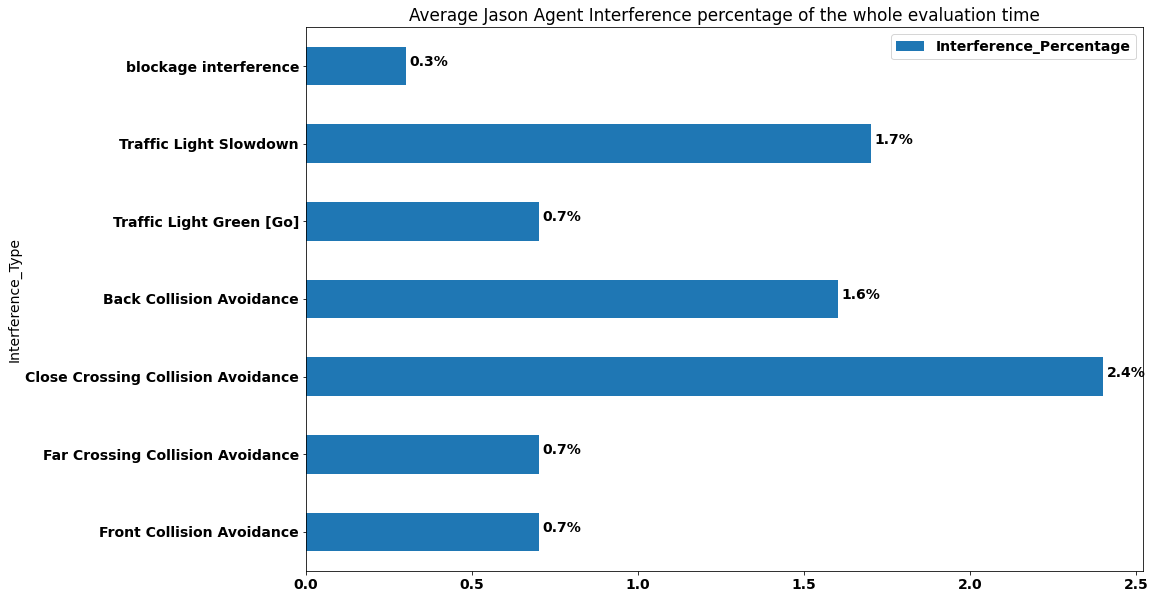

In [320]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

mean_percentage = round(jason_metrics_csv.describe()*100,1)
mean_percentage = mean_percentage[additional_metrics_columns[1:]][1:2].values[0]
final_df_s = pd.DataFrame({'Interference_Percentage': mean_percentage
                  , 'Interference_Type': additional_metrics_columns[1:]}) 
final_df_s.index = final_df_s.Interference_Type
graph = final_df_s.plot.barh(figsize=(15,10))
graph.set_title("Average Jason Agent Interference percentage of the whole evaluation time")
show_values(graph, is_vertical= False)

print("Total Average Agent Interferance Percentage: (%.1f%s)"%(mean_percentage.sum(),"%"))